<a href="https://colab.research.google.com/github/phmehta95/MedicalPhysicsMSc/blob/main/Session_2_Containers_and_Functions(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Python containers

We've already encountered *lists*, which are the most common type of container that Python provides natively. There are however a range of other containers that have different uses.

## Dictionaries

Another important data type we will look at is 'Dictionaries'. Dictionaries pair a *key* with a *value*. Often we use the key (which is commonly a string) to look up the associated value (e.g. hospital number to look up a patient's current BP measurement).

The combination of key and value makes up a dictionary item.

Dictionaries can be nested so that they can be used to create something akin to a data table or dataframe (though large dataframes are best handled using the `pandas` module, which you will learn about in the next session).

We use curly brackets to define a type dictionary:

In [1]:
meal_dict={}

We can define key, value  pairs in the dictionary in the following way:

In [2]:
meal_dict['starter'] = 'Bruschetta'
meal_dict['aperitif'] = 'Pinneau'
meal_dict['main'] = 'Seafood Pasta'
meal_dict['dessert'] = 'Tiramisu'

print (meal_dict)

{'starter': 'Bruschetta', 'aperitif': 'Pinneau', 'main': 'Seafood Pasta', 'dessert': 'Tiramisu'}


Or more succinctly using this syntax:

In [3]:
meal_dict = {'starter': 'Bruschetta', 'aperitif': 'Pinneau', 'main': 'Seafood Pasta', 'dessert': 'Tiramisu'}
print (meal_dict)

{'starter': 'Bruschetta', 'aperitif': 'Pinneau', 'main': 'Seafood Pasta', 'dessert': 'Tiramisu'}


Dictionaries are *iterables*, and by default will iterate over their *keys*:


In [4]:
for key in meal_dict:
    print(key, meal_dict[key])  # prints key and value

starter Bruschetta
aperitif Pinneau
main Seafood Pasta
dessert Tiramisu


In the above, note that we are retrieving *values* by providing their corresponding *key* using square brackets (as we did for indexing lists).

Alternatively, we can loop over both keys and values using the `items()` method:

In [5]:
for k,v in meal_dict.items():
  print (k,v)

starter Bruschetta
aperitif Pinneau
main Seafood Pasta
dessert Tiramisu


We can check if a key is present in a list and if it's not there add it:


In [6]:
if 'drink' not in meal_dict:
  meal_dict['drink'] = 'Lemonade'
print (meal_dict)

{'starter': 'Bruschetta', 'aperitif': 'Pinneau', 'main': 'Seafood Pasta', 'dessert': 'Tiramisu', 'drink': 'Lemonade'}


### Operations on `dict`

`pop()` removes an item from the dictionary, returning the value from the associated key:


In [7]:
element = meal_dict.pop ('drink')
# we no longer have a 'drink' in our dictionary :-(
print ('Drink was:', element)
print ('Dictionary is now:', meal_dict)

Drink was: Lemonade
Dictionary is now: {'starter': 'Bruschetta', 'aperitif': 'Pinneau', 'main': 'Seafood Pasta', 'dessert': 'Tiramisu'}


The `keys()` method gives the list of keys in the dictionary:

In [8]:
print (list (meal_dict.keys()))

['starter', 'aperitif', 'main', 'dessert']


The `values()` method gives the corresponding list of values from the dictionary:


In [9]:
print(list(meal_dict.values()))

['Bruschetta', 'Pinneau', 'Seafood Pasta', 'Tiramisu']


The `items()` method produces a list of (key, value) pairs:

In [10]:
print (list (meal_dict.items()))

[('starter', 'Bruschetta'), ('aperitif', 'Pinneau'), ('main', 'Seafood Pasta'), ('dessert', 'Tiramisu')]


The `get()` method is sometimes preferable to the direct method (square brackets) because if the key doesn't exist `get()` will return 'None' rather than an error:

In [11]:
y = meal_dict.get ('pudding')
print (y)

None


The `update()` method gives us a way of changing/updating items in a dictionary. Consider two dictionaries:


In [12]:
clinic_data = {'123456Z': 25.1, '234567Y':19.2, '345678X': 28.1 }
more_clinic_data = {'456789W':27.0, '567890V':24.4}

# upate clinic_data_1 with more_clinic_data:
clinic_data.update (more_clinic_data)
print (clinic_data)

{'123456Z': 25.1, '234567Y': 19.2, '345678X': 28.1, '456789W': 27.0, '567890V': 24.4}


### Exercise 1

Use a *list* comprehension to extract the keys and values from `meal_dict`.

In [13]:
for k,v in meal_dict.items():
  print (k,v)





starter Bruschetta
aperitif Pinneau
main Seafood Pasta
dessert Tiramisu


## Comprehensions in Dictionaries

We have come across the very useful concept of comprehensions applied to lists. Similarly, we can use comprehensions for dictionaries.

Let's make a dictionary from 2 lists:

In [14]:
hosp_numbers = ['564327X','734767Z', '7776664B', '324890N', '985674K']
BMIs = [20.1,15.3,17.7, 25.5,30.0]

# this dictionary comprehension creates a dictionary where 'a' is the key and 'b' is the value.
# the zip() function creates an iterable combining hosp_numbers and BMIs
pat_details= { a:b for a,b in zip(hosp_numbers, BMIs) }

print (pat_details)
print (pat_details.get ('564327X'))

{'564327X': 20.1, '734767Z': 15.3, '7776664B': 17.7, '324890N': 25.5, '985674K': 30.0}
20.1


In [16]:
# calculate the mean BMI across our patient sample using the sum() function:
mean_BMI = sum (pat_details.values()) / len(pat_details)
print (mean_BMI)

21.72


### Exercise 2

Can you create the dictionary `pat_details` using a `for` loop instead of a dictionary comprehension?

In [17]:
for x,y in zip(hosp_numbers,BMIs):
    pat_details = (x,y)
    print (pat_details)

('564327X', 20.1)
('734767Z', 15.3)
('7776664B', 17.7)
('324890N', 25.5)
('985674K', 30.0)


### Nested Dictionairies

The best way to think of a nested dictionary is as a dictionary of dictionairies. It's a useful concept because we can store data as if in a Table  with row or column headings. Imagine we have a group of patient ids and under each id we want to put appropriate information about the patient (sex, forename, surname, dob, date of last clinic visit, BMI etc). We can create a dictionary for each patient and populate with the other data. In this example we create a dictionary of patient ids and for each patient id we create a dictionary of patient details.


In [18]:
pats = {'789563A': {'forename': 'John', 'surname': 'Smith', 'sex': 'Male' ,'dob': '27/07/2000', 'LastVisit':'21/06/2022', 'BMILastVisit': 27.1},
        '987654B': {'forename': 'Johanna', 'surname': 'Smithson', 'sex': 'Female' ,'dob': '26/06/1985', 'LastVisit':'10/06/2023', 'BMILastVisit':18.9},
        '363421C': {'forename': 'Jason', 'surname': 'Smithy', 'sex': 'Male' ,'dob': '25/05/1990', 'LastVisit':'20/03/2023', 'BMILastVisit':17.8},
        '456789D': {'forename': 'Sarah', 'surname': 'Smith-Beaumont', 'sex': 'Female' ,'dob': '13/07/1986', 'LastVisit':'10/06/2023', 'BMILastVisit':28.3}}

print (pats)

{'789563A': {'forename': 'John', 'surname': 'Smith', 'sex': 'Male', 'dob': '27/07/2000', 'LastVisit': '21/06/2022', 'BMILastVisit': 27.1}, '987654B': {'forename': 'Johanna', 'surname': 'Smithson', 'sex': 'Female', 'dob': '26/06/1985', 'LastVisit': '10/06/2023', 'BMILastVisit': 18.9}, '363421C': {'forename': 'Jason', 'surname': 'Smithy', 'sex': 'Male', 'dob': '25/05/1990', 'LastVisit': '20/03/2023', 'BMILastVisit': 17.8}, '456789D': {'forename': 'Sarah', 'surname': 'Smith-Beaumont', 'sex': 'Female', 'dob': '13/07/1986', 'LastVisit': '10/06/2023', 'BMILastVisit': 28.3}}


We can present this information in a more digestible format. We can access all the 1st level keys in `pats` (`id`) and draw out each nested dictionary (`record`):


In [19]:
for id,record in pats.items():
  print (f'patient: {id}')
  for entry,data in record.items():
    print (f'  {entry:>16}: {data}')
  print ('')

patient: 789563A
          forename: John
           surname: Smith
               sex: Male
               dob: 27/07/2000
         LastVisit: 21/06/2022
      BMILastVisit: 27.1

patient: 987654B
          forename: Johanna
           surname: Smithson
               sex: Female
               dob: 26/06/1985
         LastVisit: 10/06/2023
      BMILastVisit: 18.9

patient: 363421C
          forename: Jason
           surname: Smithy
               sex: Male
               dob: 25/05/1990
         LastVisit: 20/03/2023
      BMILastVisit: 17.8

patient: 456789D
          forename: Sarah
           surname: Smith-Beaumont
               sex: Female
               dob: 13/07/1986
         LastVisit: 10/06/2023
      BMILastVisit: 28.3



You might want to access elements in the dictionary. You can do this directly with the following formulation:


In [20]:
print (pats['363421C']['sex'])
print (pats['789563A']['BMILastVisit'])

Male
27.1


You can add more data. Here we add a record for a new patient:

In [21]:
pats['786543Z'] = {'forename': 'Angelina', 'Surname': 'Jacobs', 'sex': 'Female' ,'dob': '12/03/1964', 'LastVisit':'10/01/2022', 'BMILastVisit':19.0}

print (pats)

{'789563A': {'forename': 'John', 'surname': 'Smith', 'sex': 'Male', 'dob': '27/07/2000', 'LastVisit': '21/06/2022', 'BMILastVisit': 27.1}, '987654B': {'forename': 'Johanna', 'surname': 'Smithson', 'sex': 'Female', 'dob': '26/06/1985', 'LastVisit': '10/06/2023', 'BMILastVisit': 18.9}, '363421C': {'forename': 'Jason', 'surname': 'Smithy', 'sex': 'Male', 'dob': '25/05/1990', 'LastVisit': '20/03/2023', 'BMILastVisit': 17.8}, '456789D': {'forename': 'Sarah', 'surname': 'Smith-Beaumont', 'sex': 'Female', 'dob': '13/07/1986', 'LastVisit': '10/06/2023', 'BMILastVisit': 28.3}, '786543Z': {'forename': 'Angelina', 'Surname': 'Jacobs', 'sex': 'Female', 'dob': '12/03/1964', 'LastVisit': '10/01/2022', 'BMILastVisit': 19.0}}


### Exercise 3

Can you write code to calculate the mean BMI from the patients in the dictionary 'pats'?

In [27]:
total_bmi = 0
print(len(pats))
for x in pats.values():
  bmi = x['BMILastVisit']
  total_bmi = bmi + total_bmi
mean_bmi = total_bmi/len(pats)
print (mean_bmi)


5
22.22


## Tuples

The next iterable we will look at is the tuple. Tuples are very like lists in that they are indexed, and they can contain more than a single variable type. The main difference is that they are *immutable*, meaning that you cannot change the content of a tuple. So, why use them? They are more memory efficent than lists, and it's a little bit quicker to access the elements.

Tuples are written with *round* brackets:

In [ ]:
# The hospital number of a patient is unique and you should not wish to change it.
HospNumbers = ('564327X','734767Z', '7776664B', '324890N', '985674K')
for x in HospNumbers:
    print(x)

564327X
734767Z
7776664B
324890N
985674K


You can find the index of a certain value within the tuple:


In [ ]:
print (HospNumbers.index('734767Z'))

1


You can assign individual elements of a tuple to another variable:


In [ ]:
y = HospNumbers[0]
print (y)

564327X


You can convert a tuple to a list:


In [ ]:
HospNumbersList = list(HospNumbers)

print (HospNumbersList)

['564327X', '734767Z', '7776664B', '324890N', '985674K']


Here's another list (tuple) of what could be considered immutable values of individuals: birth dates


In [ ]:
DoBs = ('20/05/2000','20/05/2007', '31/01/1956', '25/12/1999', '01/01/2001')

# we can associate HospNumbers and DoBs by applying zip()

pat_data = tuple (zip (HospNumbers, DoBs))

# you can see that PatData is a tuple of Tuples:
print (pat_data)

(('564327X', '20/05/2000'), ('734767Z', '20/05/2007'), ('7776664B', '31/01/1956'), ('324890N', '25/12/1999'), ('985674K', '01/01/2001'))


You can access each element within that list (tuple) by multiple indexing


In [ ]:
print (pat_data[0][1])

20/05/2000


### Exercise 4

Use `for` loops to print out each element of `pat_data`.

In [ ]:
#write your code here

## Sets

Another iterable is `set`. In maths, 'sets' contain immutable members of a group. For example, the set of integers between 1 and 100 that are divisible by 2. You could also have a set of square numbers between 1 and 100. In this case, the members are *unordered*, *unindexed*, and *unique* (no duplicates).



In [ ]:
# Note how an empty set is defined
divisibleby2 = set()

# add all integers to the set that are between 1 and 101 divisible by 2
for i in range (1,101):
  if not i%2:
    # you can add elements to a set:
    divisibleby2.add (i)

print (divisibleby2)

{2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100}


In [ ]:
#create a set of all square numbers up to 101
squaresto100 = set()

i=1
while (i**2<101):
  squaresto100.add (i**2)
  i+=1

print (squaresto100)

{64, 1, 4, 36, 100, 9, 16, 49, 81, 25}


Note that the order of the elements is not guaranteed to follow the order they were added to the set.

### operations on `set`

The `intersection()` method computes the intersection of two sets. We can also use the `&` operator:

In [ ]:
print (divisibleby2.intersection (squaresto100))
print (divisibleby2 & squaresto100)

{64, 100, 4, 36, 16}
{64, 100, 4, 36, 16}


The `union()` method computes the union of two sets. We can also use the `|` operator:

In [ ]:
print (divisibleby2.union (squaresto100))
print (divisibleby2 | squaresto100)

{1, 2, 4, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24, 25, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 49, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100}
{1, 2, 4, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24, 25, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 49, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100}


We can identify all elements in `divisibleby2` that are not in `squaresto100` using the `-` operator:

In [ ]:
print (divisibleby2.difference (squaresto100))
print (divisibleby2 - squaresto100)

{2, 6, 8, 10, 12, 14, 18, 20, 22, 24, 26, 28, 30, 32, 34, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98}
{2, 6, 8, 10, 12, 14, 18, 20, 22, 24, 26, 28, 30, 32, 34, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98}


We can use the `ymmetric difference()` method to identify all elements in `divisibleby2` that are not in `squaresto100` and vice-versa:

In [ ]:
print (divisibleby2.symmetric_difference (squaresto100))

{1, 2, 6, 8, 9, 10, 12, 14, 18, 20, 22, 24, 25, 26, 28, 30, 32, 34, 38, 40, 42, 44, 46, 48, 49, 50, 52, 54, 56, 58, 60, 62, 66, 68, 70, 72, 74, 76, 78, 80, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98}


The `discard()` method is used to remove a specific instance from the set:

In [ ]:
divisibleby2.discard (6)
print (divisibleby2)

{2, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100}


The `remove()` method is a bit like `discard()`, but will throw an error if the element isn't present:

In [ ]:
divisibleby2.remove (9)
print (divisibleby2)

KeyError: 9

Let's consider some examples of using sets with a more practical flavour.

Remember our list of Hospital Numbers?


In [ ]:
HospNumbersList.append ('7776664B')
print (HospNumbersList)

['564327X', '734767Z', '7776664B', '324890N', '985674K', '7776664B']


Now we have two hospital numbers that are the same. We can use `set` to remove duplicate values:


In [ ]:
print (list (set (HospNumbersList)))

['734767Z', '985674K', '7776664B', '564327X', '324890N']


Here's another example. Every patient coming into your unit has a diagnosis. You might want to create a set of diagnoses that are seen by your unit. You could use such information to create a diagnosis table in a database.


In [ ]:
PatDetails= [('123456A', '01/01/2000', 'Achondroplasia'), ('234567B', '02/02/2001', 'Brachycardia'), ('345678C', '03/03/2002', 'Cystic Fibrosis'), ('456789D', '04/04/2004', 'Cerebral Palsy'), ('567890E', '05/05/2005', 'Bradycardia'), ('678901F','06/06/2006', 'Cystic Fibrosis')]
DiagnosesSet = set()
for x in PatDetails:
   # takes the third element of each tuple in PatDetails
   # and adds it to the set. Removes any duplicate values.
  DiagnosesSet.add (x[2])
print (DiagnosesSet)

{'Cystic Fibrosis', 'Bradycardia', 'Achondroplasia', 'Cerebral Palsy', 'Brachycardia'}


### Exercise 5

Look up the `issubset()` and `issuperset()` methods and apply to  two sets that you have made up. Print out your results.

In [ ]:
# write your code here

# Functions

It is a little bit inconvenient to keep writing the same code like the complex BMI example from the previous session. In [functional programming](https://en.wikipedia.org/wiki/Functional_programming), one tries to break down a program into reusable functional units (where each function has specified inputs and returns specified outputs). As you might imagine, there is a whole field of academia dedicated to it!

For us, it means making callable routines that we can use time and time again to make our code more readable & efficient. Such [functions](https://www.geeksforgeeks.org/python/python-functions/) are very useful because they help you organise and *reuse* your code.


## How to define a function

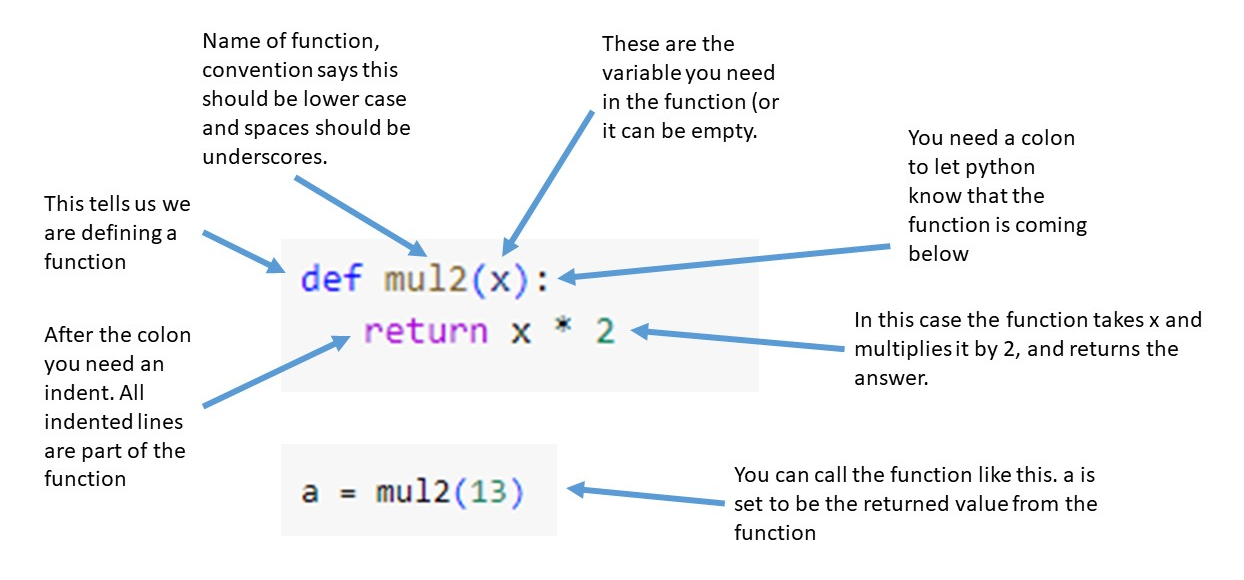


To illustrate, we will modify our BMI code (from the previous session) and insert it into a *function* that returns a string containing advice for the user:

In [ ]:
def calc_BMI_and_advise_AdultVersion (height_metres,  weight_kg):
  """This function takes as input the height and weight of the adult person,
  calculates their BMI and returns a string containing some advice."""
  BMI = weight_kg/height_metres**2
  # The ideal body weight for an adult:
  IBW = 22.0*height_metres**2
  if BMI > 30.0:
    advice_string = f'You are obese. To get to an ideal weight of {IBW:.2f}kg, '\
                    f'you need to lose {weight_kg-IBW:.2f}kg'
  elif BMI > 25.0:
    advice_string = f'You are overweight. To get to an ideal weight of {IBW:.2f}kg, '\
                    f'you need to lose {weight_kg-IBW:.2f}kg'
  elif BMI > 18.5:
    advice_string = 'You are a healthy weight'
  else:
    advice_string = f'You are underweight. To get to an ideal weight of {IBW:.2f}kg, '\
                    f'you need to gain {IBW-weight_kg:.2f}kg'
  return advice_string

**Notes:**

- Functions are defined using the `def` keyword, followed by the *name* of the function, and then the list of *arguments* in round brackets, with a final colon (`:`)
- The final colon is important, and signals the start of a new *code block*.
- As with the `for` and `while` loops, the *indentation* is important as it determines which code is in which block.
- We can *return* from the function at any point once we are done. This is normally at the end of the function, but we can use `return` statements anywhere.
- The `return` statement is used to pass the desired output back to the code that called our function. This will often be a single variable, but can be anything we need, including a list, tuple or dictionary.
- We can use the backslash `\` character at the end of a line to contine the same line of code on the next physical line. This is useful in cases where your code would otherwise run over the width of your display.


We can now *invoke* or *call* our new function:

In [ ]:
print (calc_BMI_and_advise_AdultVersion (height_metres=1.67, weight_kg=70.0))

You are overweight. To get to an ideal weight of 61.36kg, you need to lose 8.64kg


You'll note that Python allows you to explicitly name each argument when invoking a function (we wrote `height_metres=1.67`, etc). We could have invoked the function simply as:

In [ ]:
print (calc_BMI_and_advise_AdultVersion (1.67, 70.0))

You are overweight. To get to an ideal weight of 61.36kg, you need to lose 8.64kg


... which has the same effect. While we don't *need* to explicitly name our arguments in this case, doing so really helps to make your code more readable: it's obvious what each number means when they're labelled, but not so obvious otherwise!

You'll also note that we placed some documentation about the function below the function declaration (the line that declares the name and arguments of the function). We could have used a comment (starting with a `#`) to do this, but Python provides a convenient mechanism to document functions and classes using [docstrings](https://www.geeksforgeeks.org/python/python-docstrings/), which are string enclosed within triple inverted commas (single or double), placed directly below the function declaration. This allows python to display the documentation using the built-in `help()` function:

In [ ]:
help (calc_BMI_and_advise_AdultVersion)

Help on function calc_BMI_and_advise_AdultVersion in module __main__:

calc_BMI_and_advise_AdultVersion(height_metres, weight_kg)
    This function takes as input the height and weight of the adult person,
    calculates their BMI and returns a string containing some advice.



### Exercise 6

Write a simple function to add `a` and `b`:

In [ ]:
# write your code here

## Suggestions for best practice

For clarity in naming functions:

1. **Use lowercase letters:** function names should be in lowercase. If the function name consists of multiple words, separate them using underscores (`_`).

2. **Be descriptive and use clear names:** the function name should clearly describe the purpose of the function. This makes the code more readable and easier for others to understand.

3. **Avoid single-letter names:** single-letter names can be confusing and are not descriptive. Choose names that are meaningful and explanatory.

## Function nesting

You can also *nest* functions in Python. This heightens code organisation and utility. It is particularly useful if you don't want the nested or 'inner' functions to be seen by other functions. This is sometimes called *privacy* or *encapsulation*. Let's adapt our code from the last two examples to demonstrate a simple application of nested or inner functions.

Here, we see some aspects of functional programming:
1. **Modularity:** the breaking down of the program into smaller elements with specific tasks to do. Smaller functions are simpler to understand and check for errors.
2. **debugging and testing:** it is easy to test and debug each part of a simple function if the inputs and outputs are specified.
3. **composability:** functional programming allows the reuse of code. In the example below, I could reuse code for Girls and Boys separately.


In [ ]:

def weight_advice (age, height_metres, weight_kg, sex):
  """Function to output weight advice for adults and children
  based on weight charts (Adults) and a regression equation (Children).
  The routine uses nested (inner) functions."""

  def IBW_adult (height, weight):
    return 22.0*height**2

  def IBW_child (height, weight, male_or_female):
    return ( 39.0 if male_or_female=='Male' else 42.0 ) + 2.27*(height*12/0.3048-60.)

  def produce_advice_string (weight, IBW):
    # If you are >110% of your Ideal Body Weight
    if weight-IBW > 0.1*weight:
      advice_string = f'You are obese. To get to an ideal weight of {IBW:.2f}kg, '\
                      f'you need to lose {weight-IBW:.2f}kg'

    #If you are with 90 and 110% of your Ideal Body Weight
    elif abs(weight-IBW) < 0.1*weight:
      advice_string = f'The patient is a healthy weight of {weight:.2f}kg'

    # If you are <90% of your Ideal Body Weight
    else:
      advice_string = f'The patient is underweight. To get to an ideal weight of {IBW:.2f}kg, '\
                      f'the patient needs to gain {IBW-weight:.2f}kg'

    return advice_string


  if age > 18.0:
    IBW = IBW_adult (height_metres, weight_kg)
  else:
    IBW = IBW_child (height_metres, weight_kg, sex)
  advice = produce_advice_string (weight_kg, IBW)

  return advice

We can now use our improved function just as we did before:

In [ ]:
print (weight_advice (32.0, 1.75, 67.0, 'Male'))

The patient is a healthy weight of 67.00kg


## Variable scope in Python

Functions are also useful in that they limit the [scope of variables](https://www.geeksforgeeks.org/python/python-scope-of-variables/), which means that variables within a function cannot be seen by the calling program (and vice versa). This is an important concept in programming. We can give variables different levels of visibility according to their roles. For example, if variables are physical constants that are used repeatedly within the module or notebook, then it makes some sense to declare them as *global variables* (accessible by any function in the module). Or, they could be variables that you wish to update by different functions. This means that they can be used by all functions within the module or notebook. If, however, variables are specific to the operation to a function (or a small number of functions) then it is usally more sensible to make them *local variables* that remain private to that function.

In the example below, we have two functions to convert non-SI units of length to the standard SI unit of metres:
one to convert feet and inches to metres and one to convert inches to metres. If we define `conv_factor_inches_to_metres` as a global variable, it will be visible to both functions, and any other part of the program. To declare a global variable, we just need to define it outside any function definition:


In [ ]:
conv_factor_inches_to_metres = 2.54/100.

def convert_feet_and_inches_to_metres (feet, inches):
  return (feet*12+inches)*conv_factor_inches_to_metres

def convert_inches_to_metres (inches):
  return inches*conv_factor_inches_to_metres

print (f'conversion factor: {conv_factor_inches_to_metres}')

conversion factor: 0.0254


We could achieve the same using local variables to store the conversion factors. But we now need to define the variable in both functions. The advantage is that the conversion factor is now local to the functions, and we can more confident that it will not be modified inadvertently by any other part of the code:

In [ ]:
def convert_feet_and_inches_to_metres_a (feet, inches):
  conv_fact = 2.54/100
  return (feet*12+inches)*conv_fact

def convert_inches_to_metres_a (inches):
  conv_fact = 2.54/100
  return inches*conv_fact

Now, `conv_fact` is not visible to any code outside the function, and the following `print()` statement produces an error:

In [ ]:
print ('conversion factor', conv_fact)

NameError: name 'conv_fact' is not defined

## Default argument values

Python also allows you to provide default values for any of your arguments when defining your function. These will be used by default unless you override them when invoking the function.

For example, the function below can be used to extend a list of numbers.

In [ ]:
def extend (x, value=0, repeat=1):
  x += [ value ] * repeat
  return x

By default, we add a single value `0`:


In [ ]:
print (extend([1,2,3]))

[1, 2, 3, 0]


...  but if we specify the values for the remaining arguments, this can be used to add an arbitrary number of some arbitrary value:

In [ ]:
print (extend([1,2,3], 4, 5))

[1, 2, 3, 4, 4, 4, 4, 4]


This is where the ability of naming arguments when invoking the function becomes especially useful: we don't need to specify *all* the arguments, only those we wish to override. In the example below, we can leave the `value` at its default value, and only specify the number of repeats:

In [ ]:
print (extend([1,2,3], repeat=5))

[1, 2, 3, 0, 0, 0, 0, 0]


## Built-in functions for lists

You can imagine how useful functions are in handling and processing data. Let's look at some of the simpler built-in functions that can be applied to lists. Later in the course we will look at using some of these built-in functions to generate quite complex and efficient computational procedures.

### `map()`

`map()` is a useful builtin function that maps another function to each element of a list or other iterable and returns an iterable of type `map`.

Imagine we wanted to apply a linear transformation to each element in a list (this is the sort of global function you might want to apply to each element in an image, or in this case convert a list of heights from inches to metres). We can do it long hand as in the example below:


In [ ]:
def convert_i2m (x):
  """function to convert inches to metres"""
  return 2.54*x/100

# list of patients' heights:
height_data_inches = [61,67,70,57,71,72,70,66]

We could produce the converted values using a `for` loop:

In [ ]:
height_data_metres = [] #create empty list

for x in height_data_inches:
  height_data_metres.append (convert_i2m(x))

print (height_data_metres)

[1.5493999999999999, 1.7018, 1.778, 1.4478, 1.8034000000000001, 1.8288, 1.778, 1.6764000000000001]


We could also do this using a list comprehension (as we saw in the last session):

In [ ]:
height_data_metres = [ convert_i2m(x) for x in height_data_inches ]
print (height_data_metres)

[1.5493999999999999, 1.7018, 1.778, 1.4478, 1.8034000000000001, 1.8288, 1.778, 1.6764000000000001]


Or we can use the `map()` function: `map()` takes each element of the list `height_data_inches` and passes it to the function `convert_i2m()` to produce an iterable of the type `map`, which we can then convert into a list:



In [ ]:
height_data_metres_map = map (convert_i2m, height_data_inches)
print (height_data_metres_map)

print (list(height_data_metres_map))

[1.5493999999999999, 1.7018, 1.778, 1.4478, 1.8034000000000001, 1.8288, 1.778, 1.6764000000000001]


Let's imagine that the function receives  elements from two separate lists (for example, heights and weights), and computes BMI. How do we cope?


In [ ]:
# Function to calculate BMI
def BMI_calc (height, weight):
  return weight/(height**2)

weight_data_kg= [60,80.,80.,60, 65., 83., 79., 48.]

# Here, BMI_calc accepts equivalently-indexed values from the two lists
# and does the computation of BMI:
BMI_data = list (map (BMI_calc, height_data_metres, weight_data_kg))

print (BMI_data)

[24.99333136263693, 27.623133882935175, 25.306173061325712, 28.624249307593722, 19.986153838604043, 24.816793460747416, 24.98984589805914, 17.07992396701047]


### `partial()`

Now imagine that we have additional fixed arguments to put into a function. Let's imagine we have a list of heights and weights from which to compute BMI, and a list of thresholds with matching labels to categorise these BMI (assuming adults only). We could hard-code the thresholds and labels directly into a function:

In [ ]:
def categorise_BMI (BMI):
  if (BMI > 30.0):
    return 'obese'
  elif (BMI > 25.0):
    return 'overweight'
  elif (BMI > 18.5):
    return 'healthy'
  else:
    return 'underweight'

and then invoke `map()` on the cmputed BMIs:

In [ ]:
print (list (map (categorise_BMI, BMI_data)))

['healthy', 'overweight', 'overweight', 'overweight', 'healthy', 'healthy', 'healthy', 'underweight']


But we could write a more generic function, taking the thresholds and corresponding labels as arguments, which would allow us to reuse it even with different classification schemes:

In [ ]:
def categorise_BMI (BMI, thresholds, labels):
  """Assign the label from the list in `labels` based on whether the BMI
  is below the corresponding threshold in `threshold`. If above all thresholds,
  the last label will be returned. There should therefore be one more label
  than thresholds"""
  assert (len(thresholds) == len(labels)-1)
  for i in range (len(thresholds)):
    if (BMI < thresholds[i]):
      return labels[i]
  return labels[-1]

We can now provide the standard classification scheme, and use it to label our BMIs. The simplest way to do this is via a list comprehension:

In [ ]:
thresholds = [18.5, 25.0, 30.0]
labels = ['underweight', 'healthy', 'overweight', 'obese']
print ([ categorise_BMI(x, thresholds, labels) for x in BMI_data ])

['healthy', 'overweight', 'overweight', 'overweight', 'healthy', 'healthy', 'healthy', 'underweight']


We could also use the `map()` function, but the problem is that the function we need to apply expects *three* arguments, not just one.

To get around this, we can use the `partial()` function, which returns another function where the last few parameters have been hard-coded:

In [ ]:
# we import the partial function from a library called functools (more about importing functions from libraries shortly)
from functools import partial

print (list (map (partial (categorise_BMI, thresholds=thresholds, labels=labels), BMI_data)))


['healthy', 'overweight', 'overweight', 'overweight', 'healthy', 'healthy', 'healthy', 'underweight']


### `filter()`

`filter()` is a built-in function related to `map()` that produces a new iterable according to whether the ouput of a function applied to the elements of the input iterable is true.

In the example below, we process our list of BMI data in `BMI_data` to include only those elements with BMI between 20 and 25:

In [ ]:
def BMIFilter (x):
  return x > 20 and x < 25

print (list (filter (BMIFilter, BMI_data)))

[24.99333136263693, 24.816793460747416, 24.98984589805914]


Note that this can also be achieved using a list comprehension (see previous session):

In [ ]:
print ([ x for x in BMI_data if BMIFilter(x)])

[24.99333136263693, 24.816793460747416, 24.98984589805914]


Or without needing an explicit filter function:

In [ ]:
print ([ x for x in BMI_data if x > 20 and x < 25 ])

[24.99333136263693, 24.816793460747416, 24.98984589805914]


### Exercise 7

Write a function that returns `True` for BMIs over a certain value. Use your function and the built-in functions `partial()` and `filter()` to generate a list of BMIs over 24 from the list `BMI_data`.

In [ ]:
# write your code here

# Lambda functions

As noted above, the actions performed by both `map()` and `filter()` can often be done more simply (and some would argue, more expressively) using list comprehensions. There are however cases where these functions provide a better fit to the problem. Where these functions really come into their own however, is where they are coupled with *lambda functions*.

## Introducing lambda functions

Lambda functions are short cuts and useful in many situations. It allows you to define a function at the point of use, keeping it within the flow of your program.

If you have not come across lambda functions before, it will seem like we are making things unnecessarily complicated, but hang in there... you will see the power of them shortly!




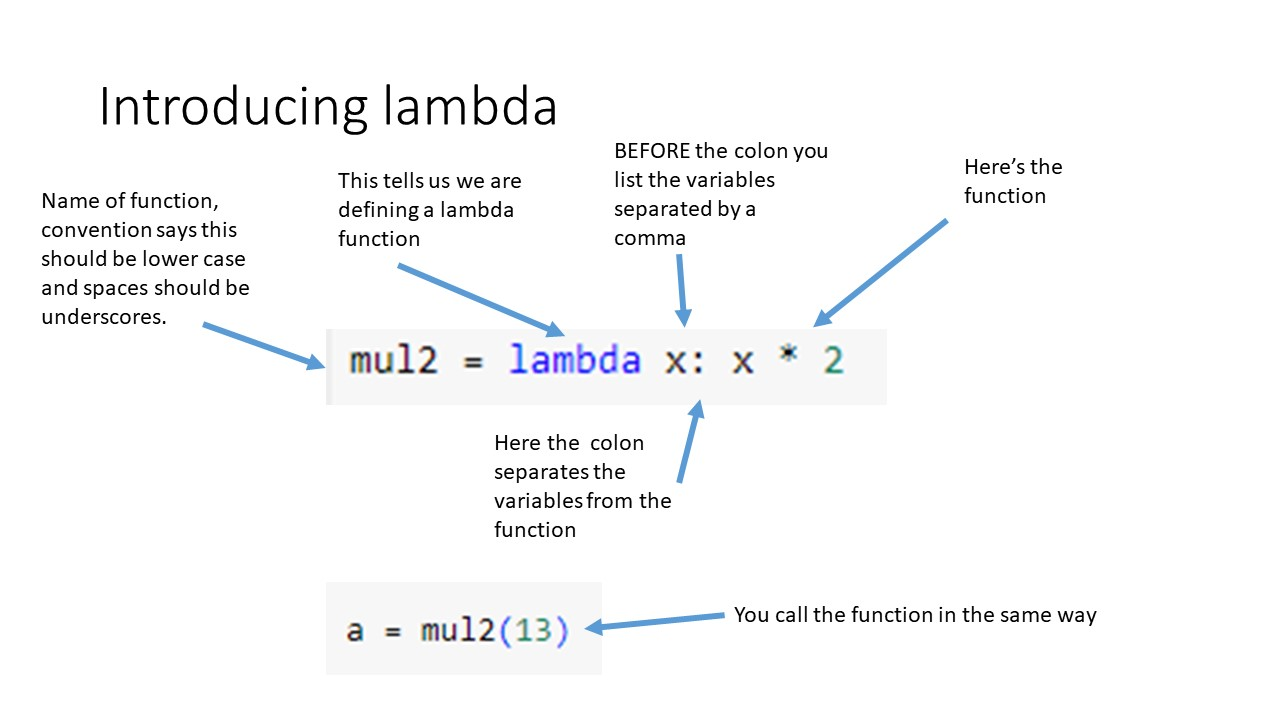

So lets consider a standard function called `mul2()` which multiplies its argument by 2 and returns the result:

In [ ]:
def mul2(x):
   return x * 2

a = mul2(13)

A lambda function allows you to condense it all into one line.
The code below is equivalent to the above snippet.

The function arguments are listed between the word `lambda` and the colon. The body of the function comes after the colon.

In [ ]:
mul2 = lambda x: x * 2

a = mul2(6)
print(a)


12


### Exercise 8

Create a standard function to calculate `2*a + b`. Can you then create a lambda equivalent?

In [ ]:
# write your code here

### Exercise 9

Given a list of the length of all the sides of a shape, calculate the perimeter of the shape. Note: the shape can have any number of sides.

Can you do this both with a standard function and a lambda function?

In [ ]:
sides=[1,2,34,7]

In [ ]:
# write your code here

## The advantage of lambda functions

If we are dealing with single numbers there's not so much of an advantage, but if we are dealing with arrays or lists, then lambda functions come into their own.

Supposing we had a list of numbers (an iterable) and we wanted to get rid of all the negative numbers. You could use a standard function...

In [ ]:
data = [3.2, 14, 39, -4, 28, 2, 37]

j=[]
for i in data:
  if i>=0:
    j.append(i)

print(j)

[3.2, 14, 39, 28, 2, 37]


Or a list comprehension:

In [ ]:
print ([x for x in data if x>=0 ])

[3.2, 14, 39, 28, 2, 37]


An alternative is to use `filter()`, as we saw earlier.

We can solve the problem above by defining a function to determine which elements are positive (this is called a _predicate_):

In [ ]:
def ispos(x):
  if x >= 0:
    return True
  else:
    return False

print (list (filter (ispos, data)))

[3.2, 14, 39, 28, 2, 37]


This does the job, but is needlessly complicated - especially compared to the list comprehension.

This is where the lambda functions become appealing: we can make all this much simpler, by using a lambda function:

In [ ]:
print (list (filter (lambda x: x >= 0, data)))

[3.2, 14, 39, 28, 2, 37]


### Exercise 10

Supposing you wanted to find all the positive even numbers in the following series. Use a filter with a lambda function.


In [ ]:
data = [ 4,2,7,9,1,-17,-30 ]

> 💡 *Tip:* use a logical `and` to combine your logical statements

In [ ]:
# write your code here

### Exercise 11

Compute the squared differences between corresponding numbers in the following two lists of numbers:


In [ ]:
x = [ 4, 3, 9, -2, 5, 7 ]
y = [ 1, 6, -3, 4, 5, 8 ]

> 💡 *Tip:* You can use the `map()` python built-in function to do this in conjunction with a lambda


In [ ]:
# write your code here

## Lambda + filter/map, or list comprehension?

Some of you may have noticed that all the examples above using `filter()` or `map()` could also have been written using _list comprehensions_.

Using the examples above:

### Filter out negative values:

In [ ]:
intlist = [3, 14, 39, -4, 28, 2, 37]

# using lambda function:
print (list (filter (lambda x: x >= 0, intlist)))

# using list comprehension:
print ([ x for x in intlist if x>= 0 ])

[3, 14, 39, 28, 2, 37]
[3, 14, 39, 28, 2, 37]


### Find all the positive even numbers in a list:

In [ ]:
mylist = [4,2,7,9,1,-17,-30]

# using lambda function:
print (list (filter (lambda x: x>0 and x%2==0, mylist)))

# using list comprehension:
print ([ x for x in mylist if x>0 and x%2==0 ])

[4, 2]
[4, 2]


### Compute the squared differences two lists:

In this case, the `zip()` built-in function comes in handy.

In [ ]:
x = [ 4, 3, 9, -2, 5, 7 ]
y = [ 1, 6, -3, 4, 5, 8 ]

# using lambda function:
print (list (map (lambda a,b: (a-b)**2, x, y)))

# using list comprehension:
print ([ (a-b)**2 for (a,b) in zip(x,y) ])

[9, 9, 144, 36, 0, 1]
[9, 9, 144, 36, 0, 1]


In practice, there is no particular reason to use one version over the other. In some situations, `map()` or `filter()` will make more sense, particularly if the function to be used is already available. In other contexts, the list comprehension will be clearer and more readable. There may be a slight (most likely negligible) performance advantage for list comprehensions, depending on the operation performed.

In short, use whichever version feels most natural!

There are however other situations where list comprehensions can't replace the use of lambda functions. For example, sorting:

## Using lambdas for sorting

The `sorted()` function returns a sorted list given an input iterable (such as a list or tuple). Consider the example below:


In [ ]:
intlist = [6, 14, 39, -4, 28, 2, 37]
fruit = ['bananna','apple','strawberry','orange']

print (sorted (intlist))
print (sorted (fruit))

[-4, 2, 6, 14, 28, 37, 39]
['apple', 'bananna', 'orange', 'strawberry']


This will sort into numerical or alphabetical order. But suppose you wanted to sort according to different criteria?


In this case, you can use a lambda function to help. In the example below, `sorted()` takes a _function_ argument called `key` to transform each value before sorting. As before, a lambda function is very convenient:

In [ ]:
# reverse sort order:
print (sorted (intlist, key=lambda i: -i))

# order by distance from 10:
print (sorted (intlist, key=lambda i: abs(10 - i)))

[39, 37, 28, 14, 6, 2, -4]
[6, 14, 2, -4, 28, 37, 39]


We can also sort by elements within lists of tuples... this will become more useful when we start using classes tomorrow.

In the example below, each tuple lists the name, grade and age of the student. Using a lambda function, we can sort by any element of the tuple:


In [ ]:
student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

# sort by name:
print (sorted (student_tuples, key=lambda student: student[0]) )

# sort by grade:
print (sorted (student_tuples, key=lambda student: student[1]) )

# sort by age
print (sorted (student_tuples, key=lambda student: student[2]) )

# sort by which students are closest to being 13 years old
print (sorted (student_tuples, key=lambda student: abs(13-student[2])) )

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
[('jane', 'B', 12), ('john', 'A', 15), ('dave', 'B', 10)]


### Exercise 12

Some children tried to guess how many sweets in a jar. The actual answer was 258. List the children in order of who was closest.

In [ ]:
guesses = [ ('charlie',200),
            ('dan',542),
            ('michah',89),
            ('alisia',145),
            ('tomi',290),
            ('abigail',300),
            ('matt',401) ]

In [ ]:
# write your code here

### Exercise 13

The tuples below represent items in a supermarket. They elements are item name, cost, isle, number in stock.

1.   Sort the list by item name
2.   Sort the list by cost (cheapest first)
3.   Remove all items where stock is less than 3


In [ ]:
shop_items=[
    ('apple', 0.43, 14, 256),
    ('cheese', 2.15, 7, 47),
    ('yoghurt', 0.89, 8, 76),
    ('pasta', 2.67, 2, 60),
    ('cereal', 3.50, 9, 16),
    ('bread', 2.65, 3, 3),
    ('shampoo', 4.80, 13, 0)
    ]

In [ ]:
# write your code here

# Classes

Classes are a powerful tool to organise related code into *objects*, and are fundamental to [object-oriented programming](https://www.geeksforgeeks.org/dsa/introduction-of-object-oriented-programming/).  A class is a *blueprint* for what kind of data (attributes) an object of that type will contain, and what operations will be possible (methods).

For example, we might define a class to represent ECG signals. It might contain the ECG trace, in the form of a vector of measurements (assumed to have been acquired sequentially in time), along with a variable storing the time interval between samples, a variable storing the time of acquisition, a string to hold the name of the patient, a string to hold the referring physician, etc. It might provide methods to report on the total length of the recording (in seconds), and more sophisticated methods to count the number of heart beats, or to compute the interval between heart beats, etc.

We have already been using classes throughout this course, since all variables in Python are classes. We can inspect the attributes and methods of these standard classes using the `dir()` function:

In [ ]:
# define an empty list:
a=[]

# list the attributes and methods of that list:
dir(a)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

We have already seen a number of these methods and how to use them in the previous session (e.g. `clear`, `copy`, `index`, etc). We can verify that these are indeed methods by using the `type()` function:

In [ ]:
type (a.clear)

builtin_function_or_method

You will note that many of these methods and attributes start and end with double underscores: this indicates that they are reserved for the internal implementation, and you should never access them directly.

Since lists are a built-in type, we cannot access its attributes directly - we can only interact with it using the methods provided. In subsequent sessions, we will learn how to define our own classes, and we will then be able to see the attributes we defined in the listing.

We already know how to use classes and their methods using the [dot notation](https://www.google.com/url?q=https%3A%2F%2Fwww.askpython.com%2Fpython%2Fbuilt-in-methods%2Fdot-notation), which is hopefully fairly intuitive. See earlier examples in this session and the previous one. For now, it is only necessary to appreciate what classes are and how to use the standard ones effectively.

# Errors in Python

There are several types of errors that can occur in Python. Each type indicates a different kind of problem in the code, and understanding these error types is crucial in creating effective and robust Python applications. The most common types of errors you'll encounter in Python are syntax errors, runtime errors, logical errors, name errors, type errors, index errors, and attribute errors.
Python code stops running when it finds an error.


## Python exceptions

Exception are a condition that interrupts the normal flow of the program.
Even if the statement or expression is syntactically correct, a program can run except "in this case", but encountering "this case" is not necessarily fatal. Exceptions may include: `NameError`, `TypeError`, `ZeroDivisionError` ([see full list here](https://www.w3schools.com/python/python_ref_exceptions.asp)).


### Syntax error

This occurs when code is written incorrectly. For example, using the wrong number of brackets, as illustrated below.

In [ ]:
a=3
print((a)

SyntaxError: incomplete input (ipython-input-2441279665.py, line 2)

The `^` shows where it went wrong

### Exception errors

These occur when the code is written with the correct syntax, but something else went wrong.

Try running the code below. It crashes, because it can't divide by zero. It generates a `ZeroDivisionError`. You can see this in the red text at the bottom. Consequently, the programme crashes.

This is a built-in exception. Python has lots of these. And python also has the option of defining your *own* exceptions.

In [ ]:
print(0/0)

In the example below we try to print the word 'hello', but forgot the inverted commas. This causes Python to assume `hello` is a variable, but no such variable is defined:

In [ ]:
print (hello)

## Handling exceptions

We use the `try` and `except` keywords to handle an error in Python.

In [ ]:
try:
  # the code you want to execute
except:
  # if the code in the try section raises an exception you will arrive here

The above code does not specify the exception raised. Most of the time, you want to have more information about the exception. To do this, you need to do to capture the exception object:

In [ ]:
try:
  # the code you want to execute
  a = unknown
except Exception as e:
  # this time you can have more information about the exception with the "e" variable
  # for example, we can print it:
  print (e)

The `Exception` object above is a *class*, and like all classes, provides attributes and methods that you can use. The `Exception` object above is the most generic type of exception, and acts as a catch-all for any exception (the built-in ones or the custom one you can create).

In general however, it is more useful to deal with specific exceptions, as illustrated below:

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print("File was not found, details of error: ", fnf_error)

In the above, note the use of [the `with` statement](https://www.geeksforgeeks.org/python/with-statement-in-python/) to handle the file operation: this is Python-specific syntax to make such operations more robust to unexpected errors. In particular, when handling files it is important to close any file we might have opened, since there is a limit to how many files a single program can open simultaneously. The `with` statement can be used to ensure the file is *always* closed once we come out of the matching block of code - irrespective of whether the code completed successfully or not.

You can add as many exception handlers as you may need to handle different types of errors, simply by listing them one after the other.

Looking at the example above, we are handling the 'file not found' error, but we might also encounter other types of errors. In this case, we can add a further `except` clause as a catch-all:

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
  print("File was not found, details of error: ", fnf_error)
except Exception as e:
  print("Unexpected error: ", e)

###  Exercice 14

In the below code we are asking the user to enter a number. Modify the code to print an error message if the value entered is not a number and ask the user again.
  - Use the `input()` method to ask the user to enter a value.
  - Convert the value to an `int` using the `int(x)` built-in function.
  - Use `try`/`except` to catch the `ValueError` built-in exception.
  - Use an infinite loop (`while True`) to keep asking until the value entered can be correctly interpreted as an integer.

In [ ]:
# write your code here

### AssertionError

These are handy to check things out in advance.

`assert` is a keyword which tests to see if something is true. If it is, nothing happens, if it is not true then it throws an `AssertionError`. Again this is the last thing it will do, before ending the code.

In [ ]:
a=5
assert a>0    # this does nothing because it is true
              # if it isn't true it throws an AssertionError


a=-5
assert a>0, 'a should be greater than zero'  # if not true, the AssertionError message is given

So far we keep ending the program as soon as the error is encountered.
We may not want to do this. We may want to know there was an issue, but carry on anyway. The code below uses `try: except` to keep the code running, just skipping over the bits it can't do.

In [ ]:
def my_divide(a,b):
  try:
    return(a/b)
  except:
    return('unable to divide by zero')

for b in [3,2,0,4]:
  print(my_divide(10,b))

There might be more than one possible problem with the input data and you might want to know which error you have run into. For example, you can't divide by zero, but nor can you divide by a string.

You might want the code to carry on working through your list of inputs but to flag up what was wrong with any input.

In the `my_divide()` function below, the code first checks that `b` is a number, and if not, raises a `TypeError`. If it is a number it checks it is not zero. If it is zero if raises an `AssertionError`. Either type of error takes you to the exception matching the error.

If no error is found the code goes to the `else` statement.

In [ ]:
def my_divide(a,b):
  try:
    if type(b) is not int and type(b) is not float:
      raise TypeError('b is not a number')
    assert b != 0
  except AssertionError as error:
    print(f'{a} divided by {b} is NOT doable, because {error}')
  except TypeError as error:
    print(f'{a} divided by {b} is NOT doable, because {error}')
  except Exception: # this catches any exceptions that haven't been caught previously
    print('unexpected error')
  else:
    print(f'{a} divided by {b} is doable. Answer is: {a/b}')


for b in [3,2.2,0,4,'fish',4]:
  my_divide(10,b)

### The `finally` keyword

We can use the `finally` keyword to execute a piece of code after the `try`...`except` block. Whatever happens, regardless of whether the `try` block is either entirely and successfully executed, or the code raises an exception and goes to the `except` block, the code in the `finally` block will always be executed.

In [ ]:
try:
  # your code
except:
  # if an exception raised
finally:
  # we finally execute the code here, whatever happens

So now the question is why do we need the `finally` block. Have a look at the code below:

In [ ]:
# create a database connection
conn = create_database_connection()
try:
  # sql query to execute
  query = "my_sql_query"
  # result by giving the query to execute and the database connection
  result = query_to_execute(query, conn)
except:
  # raise exception

How can we use the finally block in the above example ?

Whatever happens we want to close the database connection. So if we retrieve the result successfully or we raise an exception, we want to ensure that the database connection is correctly closed. Imagine you have an application with 1 million users, all executing this piece of code, we want to be sure that the database connection is correctly closed when no longer in use to prevent holding too many open connections in the app.

In [ ]:
# create a database connection
conn = create_database_connection()
try:
  # sql query to execute
  query = "my_sql_query"
  # result by giving the query to execute and the database connection
  result = query_to_execute(query, conn)
except Exception as e:
  # handle the exception as best you can (here, we just print it):
  print (e)
finally:
  # close the DB:
  conn.close()

### The `else` keyword

The `else` keyword is used to execute a block of code if no exception was thrown. For example:

In [ ]:
try:
  f = open("demofile.txt")
except:
  print("Could not open the file")
else:
  # file was opened, we can proceed:
  r = f.read()
finally:
  f.close()

## Raising exceptions

We saw how to handle exceptions in the previous section. Now we are going to see how to raise exceptions.

We use the `raise` keyword followed by the `Exception` object to which you can specify a custom message. As soon as you raise an exception it ends the scope of the code you are in.

In [ ]:
def my_divide(a,b):
  if b==0:
    raise Exception('can not divide by zero')
  else:
    return(a/b)

print (my_divide(4, 2))
print (my_divide(4, 0))

There are many different types of exceptions - see [the full list here](https://www.w3schools.com/python/python_ref_exceptions.asp). Throwing a standard `Exception` makes it difficult to handle the specific error you raised differently from other generic errors. To allow more fine-grained control, you can use one of the more specific exception subtypes:

In [ ]:
def my_divide (a,b):
  if b==0:
    raise ValueError ('cannot divide by zero')
  else:
    return (a/b)

try:
  print (my_divide(4, 2))
  print (my_divide(4, 0))
except ValueError as e:
  print (f"Invalid argument to my_divide: {e}")
except Exception as e:
  print (f"unexpected error: {e}")

### Exercice 15

We have the following cleaning app.
- We have to clean the bathroom, kitchen and bedroom
- For all areas we have common tools
- for kitchen we have two additional tools for oven and fridge

We want to raise an exception in the app (so exit the app) if we have none of the common tools.

We want to raise an exception in the kitchen cleaning if we do not have specific kitchen tools but we want to keep the app running (as bathroom and bedroom can be cleaned without these)


In [ ]:
# input
common_tools = ["bleach", "mop", "sponge"]
kitchen_tools = ["grease_remover", "scrubbing_sponge"]


def clean_kitchen (common_tools, kitchen_tools):
  print("kitchen was cleaned.")

def clean_bathroom (common_tools):
  print("Bathroom was cleaned.")


def clean_room (common_tools):
  print("Room was cleaned.")


def do_all_cleaning ():
  clean_kitchen (common_tools, kitchen_tools)
  clean_bathroom (common_tools)
  clean_room (common_tools)

do_all_cleaning ()

1. Add a check to raise an exception if no common tools

In [ ]:
# change input for part 1:
common_tools = []
kitchen_tools = ["grease_remover", "scrubbing_sponge"]

In [ ]:
# write your code here

2. Raise an exception if we don't have kitchen tools. But to not stop the app, just print the exception and continue the other cleaning.

In [ ]:
# change input for question 2
common_tools = ["bleach", "mop", "sponge"]
kitchen_tools = []

In [ ]:
# write your code here